In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

## Checking Passengers DataFrame

In [43]:
df_pass_origin = pd.read_csv('../data/passengers_top_origin18_19.csv')
df_pass_origin

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,7,7,254400,1272,1172,0,0,692,833,640,F9,20436,Frontier Airlines Inc.,D,F9,Frontier Airlines Inc.,3,3,13930,30977,ORD,"Chicago, IL",US,United States,15356,35356,TTN,"Trenton, NJ",US,United States,6,694,1,2019,7,2,F,DU
1,7,7,260400,1302,1190,0,0,1770,1636,1463,F9,20436,Frontier Airlines Inc.,D,F9,Frontier Airlines Inc.,3,3,14747,30559,SEA,"Seattle, WA",US,United States,10423,30423,AUS,"Austin, TX",US,United States,6,722,1,2019,7,4,F,DU
2,7,9,349911,1413,1297,475,6631,1242,1748,1406,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,12892,32575,LAX,"Los Angeles, CA",US,United States,10423,30423,AUS,"Austin, TX",US,United States,6,694,1,2019,10,3,F,DU
3,7,9,349911,1413,990,675,386,954,1414,1158,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,14747,30559,SEA,"Seattle, WA",US,United States,12892,32575,LAX,"Los Angeles, CA",US,United States,6,694,1,2019,10,2,F,DU
4,7,7,348320,1393,1371,1784,496,1399,1314,1153,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,14747,30559,SEA,"Seattle, WA",US,United States,13487,31650,MSP,"Minneapolis, MN",US,United States,6,622,1,2019,10,3,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194436,1,1,51700,187,117,20,0,1814,241,213,AA,19805,American Airlines Inc.,D,AA,American Airlines Inc.,3,3,14107,30466,PHX,"Phoenix, AZ",US,United States,14122,30198,PIT,"Pittsburgh, PA",US,United States,6,699,1,2019,11,4,F,DU
194437,1,1,50200,196,101,0,0,1814,209,194,AA,19805,American Airlines Inc.,D,AA,American Airlines Inc.,3,3,14107,30466,PHX,"Phoenix, AZ",US,United States,14122,30198,PIT,"Pittsburgh, PA",US,United States,6,721,1,2019,11,4,F,DU
194438,1,1,36100,128,104,0,290,1891,242,208,AA,19805,American Airlines Inc.,D,AA,American Airlines Inc.,3,3,14107,30466,PHX,"Phoenix, AZ",US,United States,14492,34492,RDU,"Raleigh/Durham, NC",US,United States,6,698,1,2019,11,4,F,DU
194439,1,1,37600,150,129,0,0,601,105,80,AA,19805,American Airlines Inc.,D,AA,American Airlines Inc.,3,3,14107,30466,PHX,"Phoenix, AZ",US,United States,14570,34570,RNO,"Reno, NV",US,United States,6,694,1,2019,11,2,F,DU


In [11]:
df_pass = df_pass_origin[['year', 'month','origin_airport_id','dest_airport_id','departures_performed','seats','passengers','distance','unique_carrier_name', 'region','origin_city_name','dest_city_name','aircraft_group', 'aircraft_type',
       'aircraft_config',  'distance_group', 'class']]

In [12]:
df_pass = df_pass.sort_values(['origin_airport_id','dest_airport_id', 'unique_carrier_name','year','month'])

In [15]:
df_pass["origin_city_name"].nunique()

10

In [19]:
df_pass[df_pass['origin_airport_id'] == 10397]

array([10397, 11057, 11292, 11298, 12266, 12892, 13930, 14107, 14747,
       14771])

array([1, 2, 3])

In [30]:
df_atl = df_pass[df_pass['origin_airport_id'] == 10397]
df_charlotte = df_pass[df_pass['origin_airport_id'] == 11057]
df_denver = df_pass[df_pass['origin_airport_id'] == 11292]
df_dallas = df_pass[df_pass['origin_airport_id'] == 11298]
df_houston = df_pass[df_pass['origin_airport_id'] == 12266]
df_la = df_pass[df_pass['origin_airport_id'] == 12892]
df_chicago = df_pass[df_pass['origin_airport_id'] == 13930]
df_phoenix = df_pass[df_pass['origin_airport_id'] == 14107]
df_seattle = df_pass[df_pass['origin_airport_id'] == 14747]
df_sanfran = df_pass[df_pass['origin_airport_id'] == 14771]

In [143]:
df_sanfran

,year,month,origin_airport_id,dest_airport_id,departures_performed,seats,passengers,distance,unique_carrier_name,region,origin_city_name,dest_city_name,aircraft_group,aircraft_type,aircraft_config,distance_group,class
59925,2018,5,14771,10135,1,169,162,2500,United Air Lines Inc.,D,"San Francisco, CA","Allentown/Bethlehem/Easton, PA",6,622,1,6,F
162170,2019,9,14771,10135,1,150,141,2500,United Air Lines Inc.,D,"San Francisco, CA","Allentown/Bethlehem/Easton, PA",6,694,1,6,F
61254,2018,4,14771,10136,1,149,60,1332,Alaska Airlines Inc.,D,"San Francisco, CA","Abilene, TX",6,694,1,3,F
73429,2018,9,14771,10140,1,181,165,896,American Airlines Inc.,D,"San Francisco, CA","Albuquerque, NM",6,699,1,2,F
76013,2018,11,14771,10140,1,187,167,896,American Airlines Inc.,D,"San Francisco, CA","Albuquerque, NM",6,699,1,2,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153499,2019,8,14771,16858,31,10819,9887,6703,Turk Hava Yollari A.O.,I,"San Francisco, CA","Istanbul, Turkey",6,637,1,14,F
159033,2019,9,14771,16858,30,10470,9542,6703,Turk Hava Yollari A.O.,I,"San Francisco, CA","Istanbul, Turkey",6,637,1,14,F
156498,2019,10,14771,16858,31,10819,9601,6703,Turk Hava Yollari A.O.,I,"San Francisco, CA","Istanbul, Turkey",6,637,1,14,F
158169,2019,11,14771,16858,30,10470,9446,6703,Turk Hava Yollari A.O.,I,"San Francisco, CA","Istanbul, Turkey",6,637,1,14,F


In [84]:
df_atl['unique_carrier_name'].unique()

array(['Delta Air Lines Inc.', 'Endeavor Air Inc.',
       'ExpressJet Airlines LLC', 'SkyWest Airlines Inc.',
       'American Airlines Inc.',
       'GoJet Airlines LLC d/b/a United Express',
       'Southwest Airlines Co.', 'Spirit Air Lines',
       'United Air Lines Inc.',
       'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern',
       'JetBlue Airways',
       'Caribbean Sun Airlines, Inc. d/b/a World Atlantic Airlines',
       'Federal Express Corporation', 'Omni Air International LLC',
       'AirBridgeCargo Airlines Limited', 'Klm Royal Dutch Airlines',
       'Singapore Airlines Ltd.', 'Asiana Airlines Inc.',
       'Atlas Air Inc.', 'Cathay Pacific Airways Ltd.',
       'China Airlines Ltd.', 'Eva Airways Corporation',
       'Kalitta Air LLC', 'Korean Air Lines Co. Ltd.',
       'Volga-Dnepr Airlines', 'VistaJet Limited',
       'Scott Aviation, LLC  d/b/a  Silver Air', 'Boutique Air',
       'Kalitta Charters II', 'Western Global', 'Frontier Airlines Inc.',
       'M

In [142]:
atl_dept = df_atl[['unique_carrier_name', 'departures_performed']].groupby(['unique_carrier_name']).sum(['departures_performed']).sort_values(['departures_performed'], ascending = False).head(20).reset_index()
char_dept = df_charlotte[['unique_carrier_name', 'departures_performed']].groupby(['unique_carrier_name']).sum(['departures_performed']).sort_values(['departures_performed'], ascending = False).head(20).reset_index()
denver_dept = df_denver[['unique_carrier_name', 'departures_performed']].groupby(['unique_carrier_name']).sum(['departures_performed']).sort_values(['departures_performed'], ascending = False).head(20).reset_index()
dallas_dept = df_dallas[['unique_carrier_name', 'departures_performed']].groupby(['unique_carrier_name']).sum(['departures_performed']).sort_values(['departures_performed'], ascending = False).head(20).reset_index()
houston_dept = df_houston[['unique_carrier_name', 'departures_performed']].groupby(['unique_carrier_name']).sum(['departures_performed']).sort_values(['departures_performed'], ascending = False).head(20).reset_index()
la_dept = df_la[['unique_carrier_name', 'departures_performed']].groupby(['unique_carrier_name']).sum(['departures_performed']).sort_values(['departures_performed'], ascending = False).head(20).reset_index()
chicago_dept = df_chicago[['unique_carrier_name', 'departures_performed']].groupby(['unique_carrier_name']).sum(['departures_performed']).sort_values(['departures_performed'], ascending = False).head(20).reset_index()
phoenix_dept = df_phoenix[['unique_carrier_name', 'departures_performed']].groupby(['unique_carrier_name']).sum(['departures_performed']).sort_values(['departures_performed'], ascending = False).head(20).reset_index()
seattle_dept = df_seattle[['unique_carrier_name', 'departures_performed']].groupby(['unique_carrier_name']).sum(['departures_performed']).sort_values(['departures_performed'], ascending = False).head(20).reset_index()
sanfran_dept = df_sanfran[['unique_carrier_name', 'departures_performed', 'dest_city_name', 'month', 'year', 'passengers', 'aircraft_type', 'aircraft_config', 'class' ]].groupby(['unique_carrier_name','dest_city_name', 'month', 'year', 'passengers', 'aircraft_type', 'aircraft_config', 'class'])[['departures_performed']].sum().sort_values(['departures_performed'], ascending = False).reset_index()
sanfran_dept

,unique_carrier_name,dest_city_name,month,year,passengers,aircraft_type,aircraft_config,class,departures_performed
0,Compass Airlines,"Los Angeles, CA",3,2018,27853,673,1,F,409
1,Compass Airlines,"Los Angeles, CA",10,2018,24150,673,1,F,368
2,United Air Lines Inc.,"Newark, NJ",5,2018,52521,622,1,F,364
3,Compass Airlines,"Los Angeles, CA",1,2018,22876,673,1,F,360
4,Compass Airlines,"Los Angeles, CA",9,2018,20728,673,1,F,350
...,...,...,...,...,...,...,...,...,...
14364,Virgin America,"Washington, DC",1,2018,0,721,1,F,0
14365,Delta Air Lines Inc.,"Sacramento, CA",3,2019,0,622,1,L,0
14366,Delta Air Lines Inc.,"Minneapolis, MN",6,2019,0,622,1,L,0
14367,Virgin America,"Chicago, IL",2,2018,0,721,1,F,0


In [107]:
df_atl[['unique_carrier_name', 'month', ]]

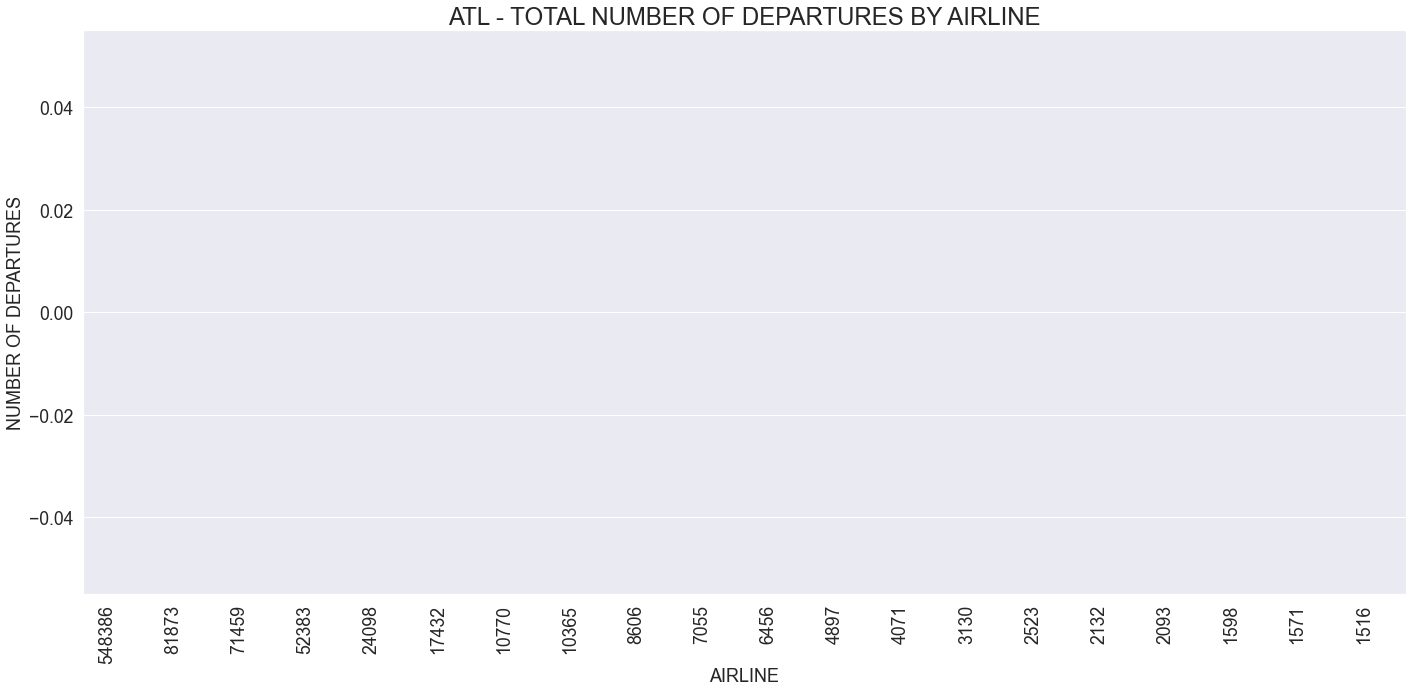

In [105]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=atl_dept['unique_carrier_name'], data=atl_dept, order=atl_dept['departures_performed'], orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('ATL - TOTAL NUMBER OF DEPARTURES BY AIRLINE', fontsize=24)
plt.xlabel('AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF DEPARTURES', fontsize=18)
plt.tight_layout()
plt.show()